# Computing wasserstein distance between lesion SUV

## Setup

### Importing base libraries

In [23]:
import os, sys

from tqdm.notebook import tqdm
from typing import List, Dict

import pandas as pd
import numpy as np
import networkx as nx

import plotly.express as px
import plotly.io as pio

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('../assets/graphmel.mplstyle')
pio.templates.default = 'seaborn'

In [4]:
sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../src'))

### Fetch data

In [5]:
CONNECTION_DIR = '/Volumes/lts4-immuno/'

fpath = os.path.join(CONNECTION_DIR, 'data_2021-11-01', 'LesionSUVs')

filenames = os.listdir(fpath)

In [6]:
def extract_gpcr_id(filename: str):
    # Extract the GPCR_ID from the filename
    # Filenames follow the following naming structure
    # `sub-${GPCR_ID}_lesion-suv.hdf`
    name, ext = filename.split('.')
    _, desc, _ = name.split('-')
    gpcr_id, _ = desc.split('_')
    
    return int(gpcr_id)

In [11]:
store = pd.HDFStore(os.path.join(fpath, filenames[0]))

if store.__contains__('post_01'):
    df = store.get('post_01')

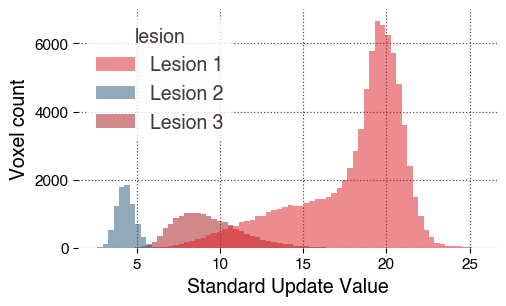

In [44]:
i, j, k = 1, 2, 10

x, y, z= df[i].to_numpy(), df[j].to_numpy(), df[k].to_numpy()
x, y, z = x[~np.isnan(x)], y[~np.isnan(y)], z[~np.isnan(z)]

plotting_df = pd.DataFrame(dict(values=list(x) + list(y) + list(z), lesion= ['Lesion 1'] * len(x) + ['Lesion 2'] * len(y) + ['Lesion 3'] * len(z)))

fig, ax = plt.subplots()

sns.histplot(data=plotting_df, x='values', hue='lesion', ax=ax)

ax.set_xlabel('Standard Update Value')
ax.set_ylabel('Voxel count')

plt.tight_layout()

#########
filename = '../report/figures/lesion_suv.png'

# Set accurate dimensions for LaTeX report
golden_ratio = (5 ** 0.5 - 1) / 2
latex_width = 5.0  # in inches
fig.set_size_inches(latex_width, latex_width * golden_ratio)

plt.savefig(filename, bbox_inches='tight')

In [46]:
from scipy.stats import wasserstein_distance

wasserstein_distance(x, y), wasserstein_distance(x, z), wasserstein_distance(z, y)

(13.609956394001475, 8.600074897442193, 5.0098814965592835)

## Save Wasserstein distances to file

In [13]:
from math import comb
from itertools import combinations
from scipy.stats import wasserstein_distance

# Create an empty DataFrame from file with header
storage = pd.read_csv('wasserstein-distance.csv')

# Iterate over all filenames to extract post-1 wasserstein distance for all patients
pbar = tqdm(zip(map(extract_gpcr_id, filenames), filenames), total=len(filenames))
for gpcr_id, filename in pbar:
    pbar.set_description(f'Processing patient {gpcr_id}')
    
    # Open connection to HDF file
    store = pd.HDFStore(os.path.join(fpath, filename))

    for study in ['pre_01', 'post_01']:
    
        # Make sure the file contains a post-1 study
        if store.__contains__(study):
            
            df = store.get(study)

            # Iterate over all combinations of lesions
            lesions_pbar = tqdm(combinations(df.columns, 2), total=comb(len(df.columns), 2), leave=False)
            for i, j in lesions_pbar:
                lesions_pbar.set_description(f'Computing Wasserstein distance for lesions ({i} -- {j})')
                
                # Fetch data for each lesion and remove NaN values
                x, y = df[i].to_numpy(), df[j].to_numpy()
                x, y = x[~np.isnan(x)], y[~np.isnan(y)]
                # Compute wasserstein distance between recordings
                d = wasserstein_distance(x, y)
                # Append row to DataFrame
                storage = storage.append(
                    dict(gpcr_id=gpcr_id, study_name=study, lesion_i=i, lesion_j=j, wasserstein_distance=d),
                    ignore_index=True)

  0%|          | 0/130 [00:00<?, ?it/s]

  0%|          | 0/3741 [00:00<?, ?it/s]

  0%|          | 0/210 [00:00<?, ?it/s]

  0%|          | 0/3240 [00:00<?, ?it/s]

  0%|          | 0/4950 [00:00<?, ?it/s]

  0%|          | 0/2211 [00:00<?, ?it/s]

  0%|          | 0/2775 [00:00<?, ?it/s]

  0%|          | 0/210 [00:00<?, ?it/s]

  0%|          | 0/253 [00:00<?, ?it/s]

  0%|          | 0/990 [00:00<?, ?it/s]

  0%|          | 0/351 [00:00<?, ?it/s]

  0%|          | 0/3828 [00:00<?, ?it/s]

  0%|          | 0/4095 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/10878 [00:00<?, ?it/s]

  0%|          | 0/946 [00:00<?, ?it/s]

  0%|          | 0/595 [00:00<?, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/528 [00:00<?, ?it/s]

  0%|          | 0/210 [00:00<?, ?it/s]

  0%|          | 0/7381 [00:00<?, ?it/s]

  0%|          | 0/17955 [00:00<?, ?it/s]

  0%|          | 0/666 [00:00<?, ?it/s]

  0%|          | 0/1830 [00:00<?, ?it/s]

  0%|          | 0/1711 [00:00<?, ?it/s]

  0%|          | 0/378 [00:00<?, ?it/s]

  0%|          | 0/741 [00:00<?, ?it/s]

  0%|          | 0/1953 [00:00<?, ?it/s]

  0%|          | 0/8515 [00:00<?, ?it/s]

  0%|          | 0/10585 [00:00<?, ?it/s]

  0%|          | 0/861 [00:00<?, ?it/s]

  0%|          | 0/703 [00:00<?, ?it/s]

  0%|          | 0/13203 [00:00<?, ?it/s]

  0%|          | 0/25200 [00:00<?, ?it/s]

  0%|          | 0/780 [00:00<?, ?it/s]

  0%|          | 0/595 [00:00<?, ?it/s]

  0%|          | 0/1596 [00:00<?, ?it/s]

  0%|          | 0/1128 [00:00<?, ?it/s]

  0%|          | 0/630 [00:00<?, ?it/s]

  0%|          | 0/1378 [00:00<?, ?it/s]

  0%|          | 0/3321 [00:00<?, ?it/s]

  0%|          | 0/23653 [00:00<?, ?it/s]

  0%|          | 0/666 [00:00<?, ?it/s]

  0%|          | 0/378 [00:00<?, ?it/s]

  0%|          | 0/780 [00:00<?, ?it/s]

  0%|          | 0/820 [00:00<?, ?it/s]

  0%|          | 0/3240 [00:00<?, ?it/s]

  0%|          | 0/17766 [00:00<?, ?it/s]

  0%|          | 0/1485 [00:00<?, ?it/s]

  0%|          | 0/1653 [00:00<?, ?it/s]

  0%|          | 0/4851 [00:00<?, ?it/s]

  0%|          | 0/8256 [00:00<?, ?it/s]

  0%|          | 0/820 [00:00<?, ?it/s]

  0%|          | 0/496 [00:00<?, ?it/s]

  0%|          | 0/2556 [00:00<?, ?it/s]

  0%|          | 0/3160 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

  0%|          | 0/3916 [00:00<?, ?it/s]

  0%|          | 0/9045 [00:00<?, ?it/s]

  0%|          | 0/11628 [00:00<?, ?it/s]

  0%|          | 0/4560 [00:00<?, ?it/s]

  0%|          | 0/2556 [00:00<?, ?it/s]

  0%|          | 0/861 [00:00<?, ?it/s]

  0%|          | 0/1891 [00:00<?, ?it/s]

  0%|          | 0/1225 [00:00<?, ?it/s]

  0%|          | 0/2145 [00:00<?, ?it/s]

  0%|          | 0/11628 [00:00<?, ?it/s]

  0%|          | 0/3321 [00:00<?, ?it/s]

  0%|          | 0/6555 [00:00<?, ?it/s]

  0%|          | 0/15931 [00:00<?, ?it/s]

  0%|          | 0/2775 [00:00<?, ?it/s]

  0%|          | 0/990 [00:00<?, ?it/s]

  0%|          | 0/4851 [00:00<?, ?it/s]

  0%|          | 0/1081 [00:00<?, ?it/s]

  0%|          | 0/378 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/7503 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1081 [00:00<?, ?it/s]

  0%|          | 0/780 [00:00<?, ?it/s]

  0%|          | 0/595 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/378 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/903 [00:00<?, ?it/s]

  0%|          | 0/1225 [00:00<?, ?it/s]

  0%|          | 0/946 [00:00<?, ?it/s]

  0%|          | 0/595 [00:00<?, ?it/s]

  0%|          | 0/2485 [00:00<?, ?it/s]

  0%|          | 0/1653 [00:00<?, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

  0%|          | 0/7260 [00:00<?, ?it/s]

  0%|          | 0/1653 [00:00<?, ?it/s]

  0%|          | 0/703 [00:00<?, ?it/s]

  0%|          | 0/465 [00:00<?, ?it/s]

  0%|          | 0/1431 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/378 [00:00<?, ?it/s]

  0%|          | 0/4186 [00:00<?, ?it/s]

  0%|          | 0/5253 [00:00<?, ?it/s]

  0%|          | 0/528 [00:00<?, ?it/s]

  0%|          | 0/2016 [00:00<?, ?it/s]

  0%|          | 0/3403 [00:00<?, ?it/s]

  0%|          | 0/6216 [00:00<?, ?it/s]

  0%|          | 0/6903 [00:00<?, ?it/s]

  0%|          | 0/11175 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

  0%|          | 0/5050 [00:00<?, ?it/s]

  0%|          | 0/8515 [00:00<?, ?it/s]

  0%|          | 0/6216 [00:00<?, ?it/s]

  0%|          | 0/1485 [00:00<?, ?it/s]

  0%|          | 0/10585 [00:00<?, ?it/s]

  0%|          | 0/19701 [00:00<?, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

  0%|          | 0/15576 [00:00<?, ?it/s]

  0%|          | 0/4186 [00:00<?, ?it/s]

  0%|          | 0/378 [00:00<?, ?it/s]

  0%|          | 0/4656 [00:00<?, ?it/s]

  0%|          | 0/253 [00:00<?, ?it/s]

  0%|          | 0/8778 [00:00<?, ?it/s]

  0%|          | 0/12720 [00:00<?, ?it/s]

  0%|          | 0/28441 [00:00<?, ?it/s]

  0%|          | 0/1378 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/5565 [00:00<?, ?it/s]

  0%|          | 0/1431 [00:00<?, ?it/s]

  0%|          | 0/253 [00:00<?, ?it/s]

  0%|          | 0/16290 [00:00<?, ?it/s]

  0%|          | 0/21115 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/253 [00:00<?, ?it/s]

  0%|          | 0/3741 [00:00<?, ?it/s]

  0%|          | 0/1596 [00:00<?, ?it/s]

  0%|          | 0/378 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

  0%|          | 0/903 [00:00<?, ?it/s]

  0%|          | 0/2016 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/1378 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/903 [00:00<?, ?it/s]

  0%|          | 0/946 [00:00<?, ?it/s]

  0%|          | 0/820 [00:00<?, ?it/s]

  0%|          | 0/2211 [00:00<?, ?it/s]

  0%|          | 0/1275 [00:00<?, ?it/s]

  0%|          | 0/2016 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/465 [00:00<?, ?it/s]

  0%|          | 0/378 [00:00<?, ?it/s]

  0%|          | 0/6670 [00:00<?, ?it/s]

  0%|          | 0/1485 [00:00<?, ?it/s]

  0%|          | 0/528 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/378 [00:00<?, ?it/s]

  0%|          | 0/741 [00:00<?, ?it/s]

  0%|          | 0/171 [00:00<?, ?it/s]

  0%|          | 0/1540 [00:00<?, ?it/s]

  0%|          | 0/1378 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

  0%|          | 0/3741 [00:00<?, ?it/s]

  0%|          | 0/9180 [00:00<?, ?it/s]

  0%|          | 0/406 [00:00<?, ?it/s]

  0%|          | 0/595 [00:00<?, ?it/s]

  0%|          | 0/1128 [00:00<?, ?it/s]

  0%|          | 0/5151 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

  0%|          | 0/595 [00:00<?, ?it/s]

  0%|          | 0/861 [00:00<?, ?it/s]

  0%|          | 0/820 [00:00<?, ?it/s]

  0%|          | 0/153 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/1711 [00:00<?, ?it/s]

  0%|          | 0/253 [00:00<?, ?it/s]

  0%|          | 0/171 [00:00<?, ?it/s]

  0%|          | 0/253 [00:00<?, ?it/s]

  0%|          | 0/210 [00:00<?, ?it/s]

  0%|          | 0/378 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

  0%|          | 0/1225 [00:00<?, ?it/s]

  0%|          | 0/7021 [00:00<?, ?it/s]

  0%|          | 0/6216 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/561 [00:00<?, ?it/s]

  0%|          | 0/23653 [00:00<?, ?it/s]

  0%|          | 0/3160 [00:00<?, ?it/s]

  0%|          | 0/1485 [00:00<?, ?it/s]

  0%|          | 0/210 [00:00<?, ?it/s]

  0%|          | 0/435 [00:00<?, ?it/s]

  0%|          | 0/1953 [00:00<?, ?it/s]

  0%|          | 0/1225 [00:00<?, ?it/s]

  0%|          | 0/528 [00:00<?, ?it/s]

  0%|          | 0/630 [00:00<?, ?it/s]

  0%|          | 0/2628 [00:00<?, ?it/s]

  0%|          | 0/14535 [00:00<?, ?it/s]

  0%|          | 0/1485 [00:00<?, ?it/s]

  0%|          | 0/15051 [00:00<?, ?it/s]

  0%|          | 0/1225 [00:00<?, ?it/s]

  0%|          | 0/2850 [00:00<?, ?it/s]

  0%|          | 0/378 [00:00<?, ?it/s]

  0%|          | 0/465 [00:00<?, ?it/s]

  0%|          | 0/465 [00:00<?, ?it/s]

  0%|          | 0/1596 [00:00<?, ?it/s]

  0%|          | 0/3403 [00:00<?, ?it/s]

  0%|          | 0/2850 [00:00<?, ?it/s]

  0%|          | 0/3741 [00:00<?, ?it/s]

In [14]:
storage.to_csv('wasserstein-distance.csv', index=False)

## Extract radiomics information

In [8]:
# Create an empty DataFrame from file with header
lesions = pd.read_csv('lesions.csv')

# Iterate over all filenames
pbar = tqdm(zip(map(extract_gpcr_id, filenames), filenames), total=len(filenames))
for gpcr_id, filename in pbar:
    pbar.set_description(f'Processing patient {gpcr_id}')
    
    # Open connection to HDF file
    store = pd.HDFStore(os.path.join(fpath, filename))
    studies = store.keys()
    
    # Iterate over all combinations of lesions
    for study in studies:
        
        # Fetch data
        df = store.get(study)
        
        for lesion in df.columns:
            
            x = df[lesion].to_numpy()
            x = x[~np.isnan(x)]
            
            voxels = x.shape[0]
            min_suv_val = x.min()
            mean_suv_val = x.mean()
            median_suv_val = np.median(x)
            sd_suv_val = x.std()
            max_suv_val = x.max()
        
            # Append row to DataFrame
            lesions = lesions.append(
                dict(gpcr_id=gpcr_id, study_name=study, lesion_label_id=lesion, voxels=voxels,
                     mean_suv_val=mean_suv_val, max_suv_val=max_suv_val, min_suv_val=min_suv_val,
                     median_suv_val=median_suv_val, sd_suv_val=sd_suv_val), ignore_index=True)

  0%|          | 0/130 [00:00<?, ?it/s]

In [10]:
lesions.to_csv('lesions.csv', index=False)